# Центральная предельная теорема своими руками

## Распределение Парето

### Гистограмма выборки

Будем рассматривать распределение Парето случайной величины с  $\alpha = 3$. Плотность вероятности для распределения Парето будет иметь следующий вид:

\begin{equation*} f(x) = \begin{cases} \frac{\alpha \cdot x_{m}^\alpha}{x ^ (\alpha+1)} &\text{если x $\ge$ $x_{m}$}\\ 0 &\text{если x < $x_{m}$} \end{cases} \end{equation*}

где $x_{m}$ - коэффициент масштаба, $\alpha$ > 0

#### Распределения Парето в жизни:


Распределение Парето иногда называют правилом «80–20», поскольку оно гласит, что 80% богатства общества принадлежит 20% его населения. Однако правило 80–20 выполняется и во многих других случаях. Например, сам Вильфредо Парето обнаружил, что 80% земли Италии принадлежит 20% населения. Он также заметил, что 80% гороха, выращенного в его саду, было получено из 20% его растений. 82,7% мирового дохода контролируется 20% населения. Отчет Microsoft за 2002 год предполагает, что 80% ошибок и сбоев Windows и MS Office вызваны 20%-ю процентами обнаруженных багов. 80% продаж приходится на 20% продукции. 80% клиентов используют только 20% функций программного обеспечения. 

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.



In [247]:
# импорт библиотек
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import pareto
import numpy as np

x_m = 1 #scale
a = 3. #alpha
samples = (np.random.pareto(a, 1000) + 1) * x_m #draws random samples from a Pareto II or Lomax distribution with a specified shape

In [248]:
# выборка объема 1000 из распределения
rv = st.pareto.rvs(a, size=1000)

In [249]:
# pdf для распределения
pdf = pareto.pdf(x = samples, b=a, loc=0, scale=1) #loc and shift to scale and/or shift the distribution

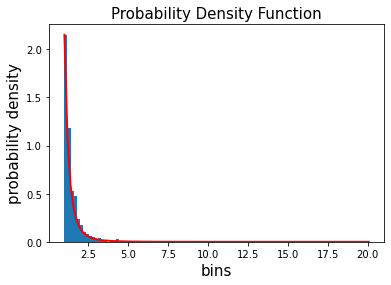

In [250]:
#гисторамма выборки и теоретическая оценка плотности вероятности нашего распределения (pdf)
count, bins, _ = plt.hist(samples, 100, density=True)
fit = a*x_m**a / bins**(a+1) #we fit a Pareto distribution to our randomly sampled data and plot this distribution on top of our data
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.title('Probability Density Function', fontsize=15)
plt.xlabel('bins', fontsize=15)
plt.ylabel('probability density', fontsize=15)
plt.show()

## Оценка распределения выборочных средних

Оценим распределение выборочных средних случайной величины. Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В нашем случае распределения Парето: $\mathbb{E}X = \frac{\alpha \cdot x_{m}}{\alpha - 1}, = 1.5$ - математическое ожидание, $\mathbb{D}X = (\frac{x_{m}}{\alpha - 1}) ^ 2 \cdot \frac{\alpha}{\alpha - 2}, = 0.75$ -дисперсия.

Таким образом, распределение выборочных средних распределения Парето с $\alpha = 3$ будет приближаться нормальным распределением $N(\mu = 1.5, \sigma^2 = \frac{0.75}{n})$.

In [251]:
# функция, которая генерирует график гистограммы выборочных средних случайной величины 
# и теоретической оценки плотности вероятности для распределения выборочных средних для объема выборки n 

def generate_pdf(n):
    means = [] # создание списка
    for i in range(1000):
        sample = st.pareto.rvs(a, size=n) # генерация выборки объема n
        sample_mean = np.mean(sample) # генерация выборочного среднего для выборки
        means.append(sample_mean)
    
    # расчет теоритеческую плотность вероятности (pdf) для нормального распределения
    mu = 1.5 # наше значение мат ожидания
    sigma = (0.75/n) ** 0.5 # наше значение сигмы
    norm_rv = st.norm(loc=mu, scale=sigma) 
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построение гистограммы выборочных средних и теоретической 
    # оценки плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, density=True, stacked=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

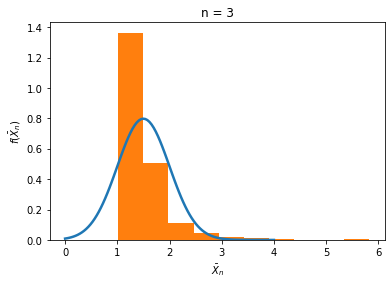

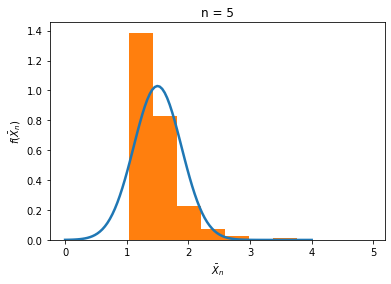

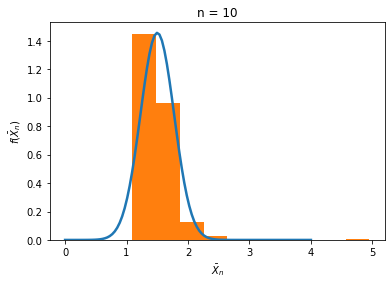

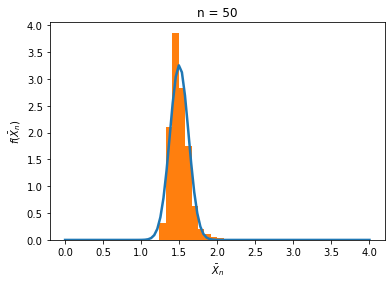

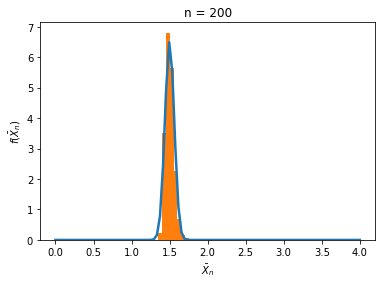

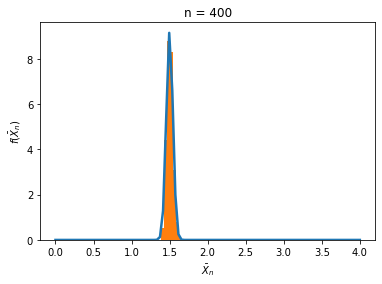

In [253]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [3, 5, 10, 50, 200, 400]:
    generate_pdf(n)

Вывод: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению.